In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import plotly.graph_objs as go

from plotly.subplots import make_subplots

In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 74.0 MB/s eta 0:00:00


In [4]:
import geopandas as gpd

In [6]:
df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_learning_NU_CLASS#/Carbon-dioxide emission.csv",encoding= 'unicode_escape')

In [7]:
df.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')

In [8]:
df.head()

Country Code Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Afghanistan   AF           93  1750                  0.0        41128771.0   
1  Afghanistan   AF           93  1751                  0.0        41128771.0   
2  Afghanistan   AF           93  1752                  0.0        41128771.0   
3  Afghanistan   AF           93  1753                  0.0        41128771.0   
4  Afghanistan   AF           93  1754                  0.0        41128771.0   

       Area % of World Density(km2)  
0  652230.0      0.40%       63/km²  
1  652230.0      0.40%       63/km²  
2  652230.0      0.40%       63/km²  
3  652230.0      0.40%       63/km²  
4  652230.0      0.40%       63/km²

In [9]:
df.tail()

Country Code Calling Code  Year  CO2 emission (Tons)  \
59615  Zimbabwe   ZW          263  2016          736467042.0   
59616  Zimbabwe   ZW          263  2017          746048675.0   
59617  Zimbabwe   ZW          263  2018          757903042.0   
59618  Zimbabwe   ZW          263  2019          768852126.0   
59619  Zimbabwe   ZW          263  2020          779383468.0   

       Population(2022)      Area % of World Density(km2)  
59615        16320537.0  390757.0      0.30%       42/km²  
59616        16320537.0  390757.0      0.30%       42/km²  
59617        16320537.0  390757.0      0.30%       42/km²  
59618        16320537.0  390757.0      0.30%       42/km²  
59619        16320537.0  390757.0      0.30%       42/km²

In [10]:
df.describe()

Year  CO2 emission (Tons)  Population(2022)          Area
count  59620.000000         5.962000e+04      5.311600e+04  5.528400e+04
mean    1885.000000         1.034774e+09      3.992260e+07  6.522073e+05
std       78.231085         1.041652e+10      1.482365e+08  1.865483e+06
min     1750.000000         0.000000e+00      1.131200e+04  2.100000e+01
25%     1817.000000         0.000000e+00      1.770414e+06  1.770450e+04
50%     1885.000000         0.000000e+00      8.673095e+06  1.103815e+05
75%     1953.000000         8.715092e+06      2.862920e+07  4.925730e+05
max     2020.000000         4.170000e+11      1.425887e+09  1.709824e+07

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [12]:
df.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [13]:
df['Code'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'BA', 'BW', 'BR', 'BN', 'BG', 'BF', 'BI', 'KH',
       'CM', 'CA', 'CV', 'CF', 'TD', 'CL', 'CN', 'CX', 'CO', 'KM', 'CG',
       'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK', 'DJ',
       'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FO',
       'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GR',
       'GL', 'GD', 'GP', 'GT', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU',
       'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO',
       'KZ', 'KE', 'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR',
       'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT',
       'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM', 'MD', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE',
       'NG', 'NU', 'KP', 'MK', 'NO', 'OM', 'PK', 'PW

In [14]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French G

In [15]:
df['Year'].unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [17]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


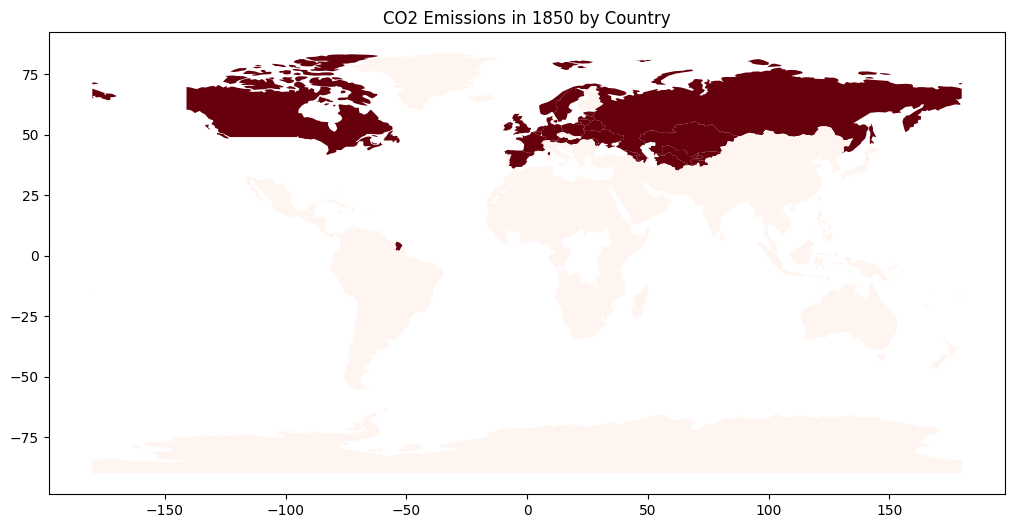

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  warnings.warn(


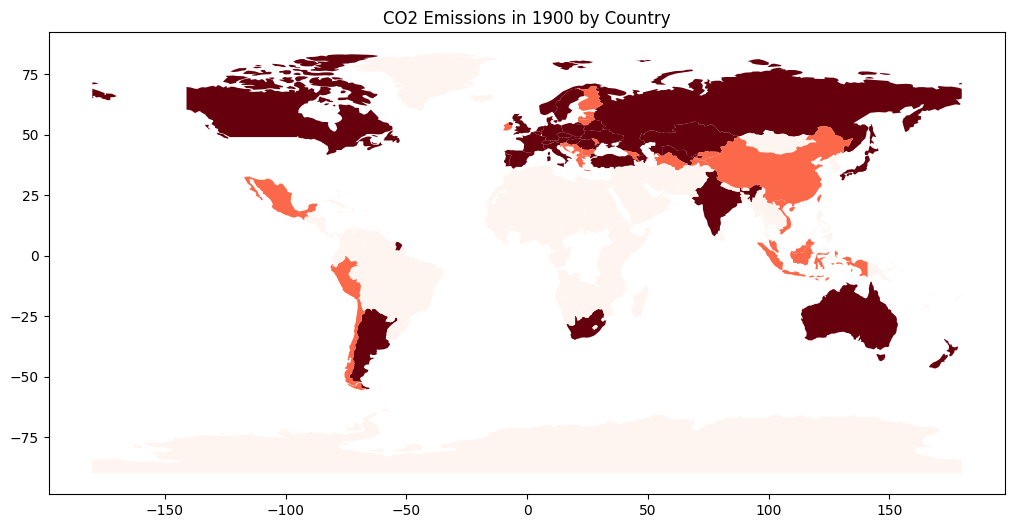

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


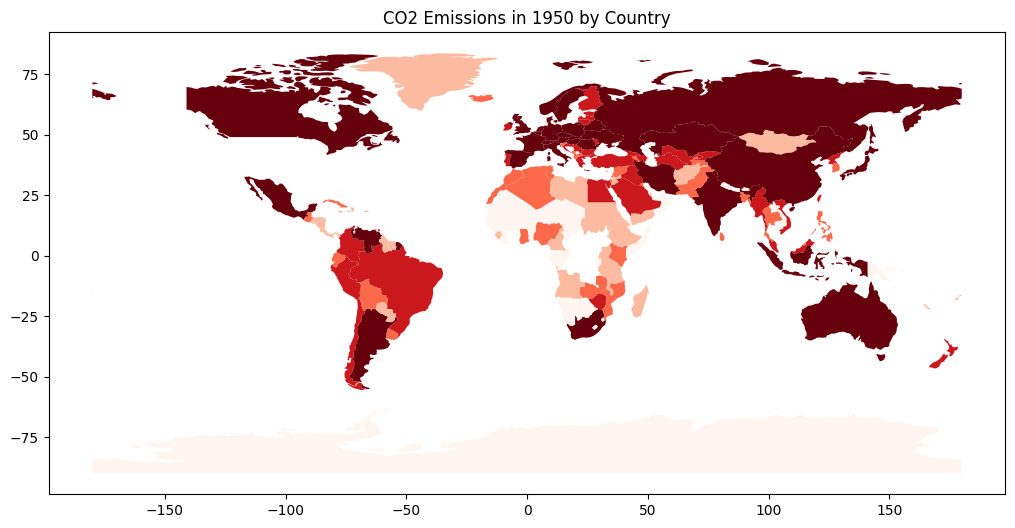

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


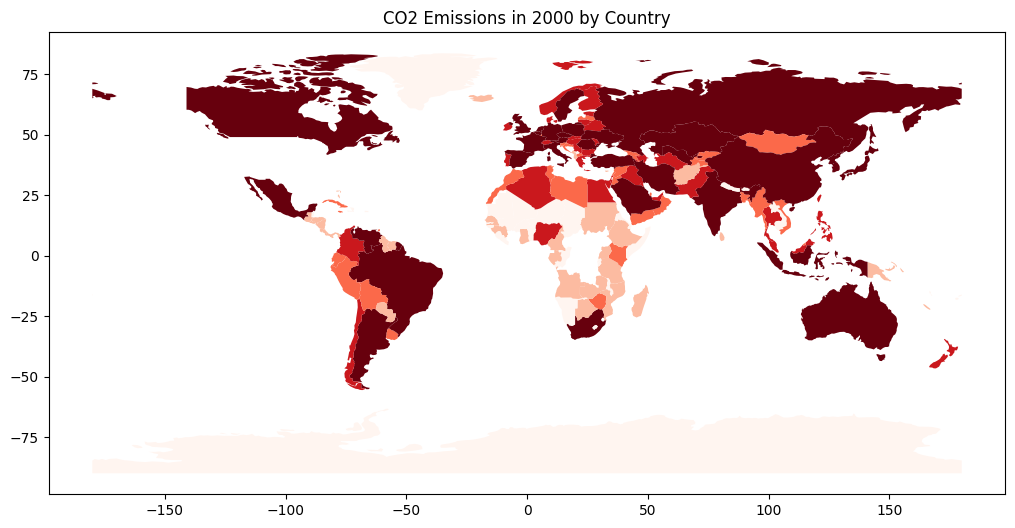

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


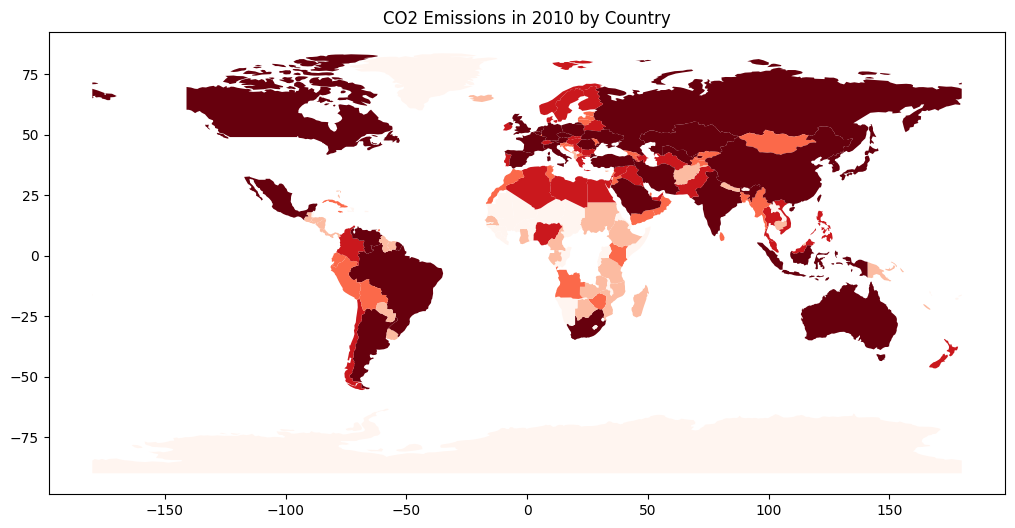

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


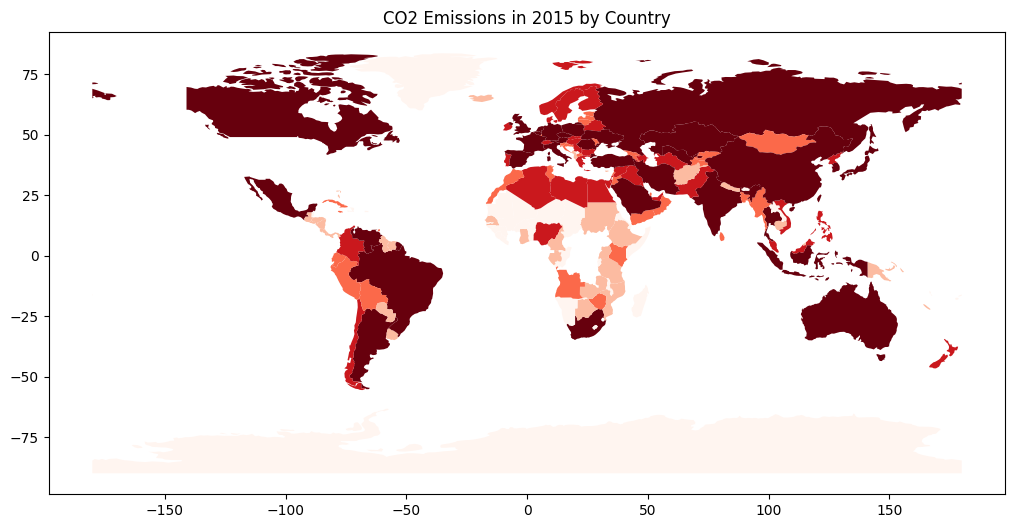

<ipython-input-18-deceef35d0c7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


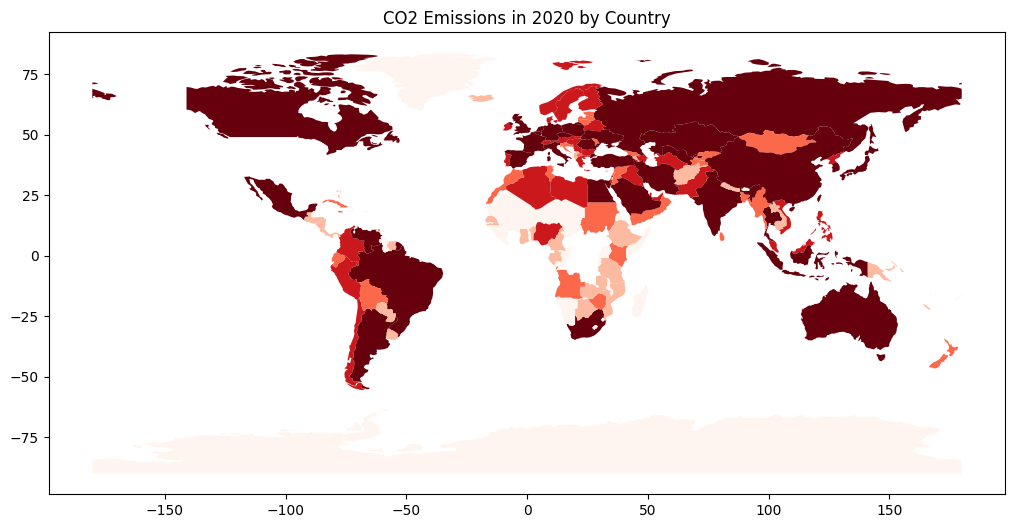

In [18]:
years = [1750, 1800, 1850, 1900, 1950, 2000, 2005, 2010, 2015, 2020]

for year in years:
    year_data = df[df["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="CO2 emission (Tons)", cmap="Reds", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions in {year} by Country")
    plt.show()

In [19]:
#most carbon emittting countrie
countries = ['United States', 'China', 'India']
for country in countries:
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Year'], country_df['CO2 emission (Tons)'], label=country)
plt.legend()
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons)')
plt.show()

In [20]:
#pairplot to check for corelation 
g = sns.PairGrid(df, hue="% of World")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [21]:
# To check for corelation between countires population and carbon emission 
countries = ['United States', 'China', 'India']
for country in countries:
    country_df = df[df['Country'] == country]
    emissions_change = country_df.loc[country_df['Year'] == 2019, 'CO2 emission (Tons)'].values[0] \
                        - country_df.loc[country_df['Year'] == 2010, 'CO2 emission (Tons)'].values[0]
    population_change = country_df.loc[country_df['Year'] == 2019, 'Population(2022)'].values[0] \
                        - country_df.loc[country_df['Year'] == 2010, 'Population(2022)'].values[0]
    plt.bar(country, emissions_change, label='CO2 Emissions Change', color='r')
    plt.bar(country, population_change, bottom=emissions_change, label='Population Change', color='b')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Change')
plt.show()

In [22]:
#to check corelation using scatter plot between population and co2 emission 
sns.scatterplot(x='Population(2022)', y='CO2 emission (Tons)', data=df)
plt.xlabel('Population')
plt.ylabel('CO2 Emissions')
plt.show()

In [23]:
sns.boxplot(x='CO2 emission (Tons)', y='Calling Code', data=df)
plt.xlabel('CO2 Emissions')
plt.ylabel('Region')
plt.show()

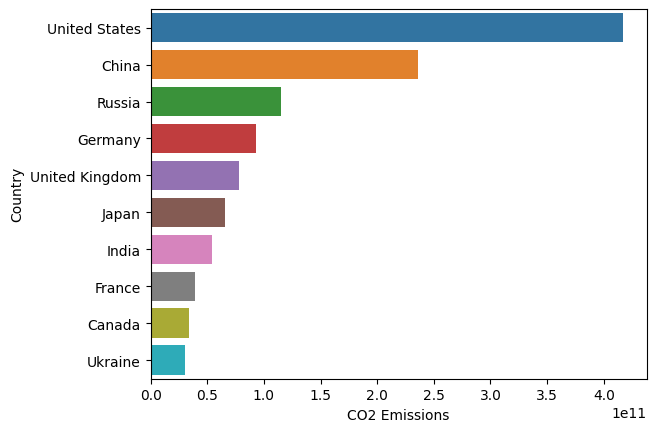

In [24]:
#top 10 countires with highest CO2 emission 
top_10 = df.groupby('Country')['CO2 emission (Tons)'].max().nlargest(10)
sns.barplot(x=top_10.values, y=top_10.index)
plt.xlabel('CO2 Emissions')
plt.ylabel('Country')
plt.show()

In [25]:
#data Preprocessing stage

In [26]:
df.drop(['Code', 'Calling Code'], axis=1, inplace=True)

In [27]:
df.isnull().sum() #null values

Country                   0
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [28]:
df['Population(2022)'].fillna(df['Population(2022)'].mean(), inplace=True)

In [29]:
print(df.duplicated().sum())

0


In [30]:
z_scores = stats.zscore(df['CO2 emission (Tons)'])

# indices of rows with z-scores greater than 3 or less than -3
outlier_indices = [i for i, z_score in enumerate(z_scores) if abs(z_score) > 3]

# new dataframe with only the outlier rows
outliers_df = df.iloc[outlier_indices]

# scatter plot of CO2 emissions versus population, with outliers highlighted
fig = px.scatter(df, x='Population(2022)', y='CO2 emission (Tons)', hover_data=['Country'], color_discrete_sequence=['blue'])
fig.add_trace(px.scatter(outliers_df, x='Population(2022)', y='CO2 emission (Tons)', hover_data=['Country'], color_discrete_sequence=['red']).data[0])
fig.show()

In [31]:
cols_to_scale = ['CO2 emission (Tons)', 'Population(2022)']

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(df[cols_to_scale])

StandardScaler()

In [34]:
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [35]:
cols_to_scale

['CO2 emission (Tons)', 'Population(2022)']

In [67]:
df1= df.drop(columns=['% of World','Density(km2)','Area'])

In [68]:
df1.isna().sum()

Country                0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
dtype: int64

In [69]:
# Split the dataset for X and Y 
X = df1.drop(['CO2 emission (Tons)'], axis=1)
y = df1['CO2 emission (Tons)']

In [70]:
X = pd.get_dummies(X, columns=['Country'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train

array([[-5.75719868e-01, -1.59061351e-01, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02],
       [ 8.69549098e-01,  4.09469781e-04, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02],
       [ 1.12534892e+00, -1.57925149e-01, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02],
       ...,
       [-1.12568947e+00, -2.83765947e-01, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02],
       [-7.41989749e-01,  5.07292804e-01, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02],
       [-1.03615954e+00, -2.16997183e-01, -6.79173016e-02, ...,
        -6.83830669e-02, -6.63415747e-02, -6.72913593e-02]])

In [74]:
#Checking with Different machine learning algorithm and also with deep learning 

In [75]:
# linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_lr)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Linear regression R^2 score:', r2_lr)
print('Linear regression mean squared error:', mse_lr)

Linear regression R^2 score: 0.27817414598742796
Linear regression mean squared error: 0.8728877152927565


In [76]:
#  Random forest Regressor
randomf_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomf_model.fit(X_train, y_train)
y_pred_randomf = randomf_model.predict(X_test)
r2_randomf = r2_score(y_test, y_pred_randomf)
mse_randomf = mean_squared_error(y_test, y_pred_randomf)
print('Random forest R^2 score:', r2_randomf)
print('Random forest mean squared error:', mse_randomf)

Random forest R^2 score: 0.9998201934277029
Random forest mean squared error: 0.00021743603005425482


In [77]:
#  Multilayer perceptron regressor
multilp_model = MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
multilp_model.fit(X_train, y_train)
y_pred_multilp = multilp_model.predict(X_test)
r2_multilp = r2_score(y_test, y_pred_mlp)
mse_multilp = mean_squared_error(y_test, y_pred_multilp)
print('Multilayer perceptron R^2 score:', r2_multilp)
print('Multilayer perceptron mean squared error:', mse_multilp)


Multilayer perceptron R^2 score: 0.9742923525388015
Multilayer perceptron mean squared error: 0.031087677911806093


In [158]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 0.004022761709634032


In [155]:
from xgboost import XGBRegressor
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots




models = [LinearRegression(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    model.fit(X_train, y_train)


preds = []
for model in models:
    preds.append(model.predict(X_test))

# Create an interactive plot to compare the predictions of the three models
fig = make_subplots(rows=1, cols=3, subplot_titles=('Linear Regression', 'Random Forest', 'XGBoost'))

# Add scatter plots of actual vs. predicted values for each model
for i in range(len(models)):
    fig.add_trace(go.Scatter(x=y_test, y=preds[i], mode='markers', 
                             name='Model {}'.format(i+1)), row=1, col=i+1)

# Add a diagonal line to represent perfect predictions
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], 
                         mode='lines', name='Perfect Predictions', line=dict(dash='dash')), 
                         row=1, col=1)
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], 
                         mode='lines', name='Perfect Predictions', line=dict(dash='dash')), 
                         row=1, col=2)
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], 
                         mode='lines', name='Perfect Predictions', line=dict(dash='dash')), 
                         row=1, col=3)

# Update the layout of the plot
fig.update_layout(title='Comparison of Predictions from Three Different Models', 
                  xaxis=dict(title='Actual Values'), yaxis=dict(title='Predicted Values'))

# Display the plot
fig.show()
